In [29]:
import numpy as np
import matplotlib.pyplot as plt

# applying KFO function
def kalman_filter(noisy_coordinates):
    # Initialization
    dt = 0.2
    F = np.array([[1, dt, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, dt],
                  [0, 0, 0, 1]])

    H = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0]])

    Q = np.array([[0.16, 0, 0, 0],
                  [0, 0.36, 0, 0],
                  [0, 0, 0.16, 0],
                  [0, 0, 0, 0.36]])

    R = np.array([[0.25, 0],
                  [0, 0.25]])

    # initial state estimate and covariance matrix
    x = np.array([noisy_coordinates[0][0], 0, noisy_coordinates[0][1], 0])  # [x, x', y, y']
    P = np.eye(4)  # Covariance matrix

    # lists to store estimated and noisy coordinates
    estimated_coordinates = [x[:2]]
    noisy_coordinates_list = [np.array(noisy_coordinates[0])]

    # Kalman filter loop
    for i in range(1, len(noisy_coordinates)):
        # prediction step
        x = F @ x
        P = F @ P @ F.T + Q

        # kalman gain calculation
        S = H @ P @ H.T + R
        K = P @ H.T @ np.linalg.inv(S)

        # update step
        measurement = np.array(noisy_coordinates[i])
        innovation = measurement - H @ x
        x = x + K @ innovation
        P = (np.eye(4) - K @ H) @ P

        # saving the estimated and noisy coordinates for plotting
        estimated_coordinates.append(x[:2])
        noisy_coordinates_list.append(measurement)

    return np.array(estimated_coordinates), np.array(noisy_coordinates_list)

a_data = np.loadtxt('a.csv', delimiter=',')
b_data = np.loadtxt('b.csv', delimiter=',')
x_data = np.loadtxt('x.csv', delimiter=',')
y_data = np.loadtxt('y.csv', delimiter=',')

# running the Kalman filter on noisy coordinates [a, b]
estimated_coords, noisy_coords = kalman_filter(np.column_stack((a_data, b_data)))

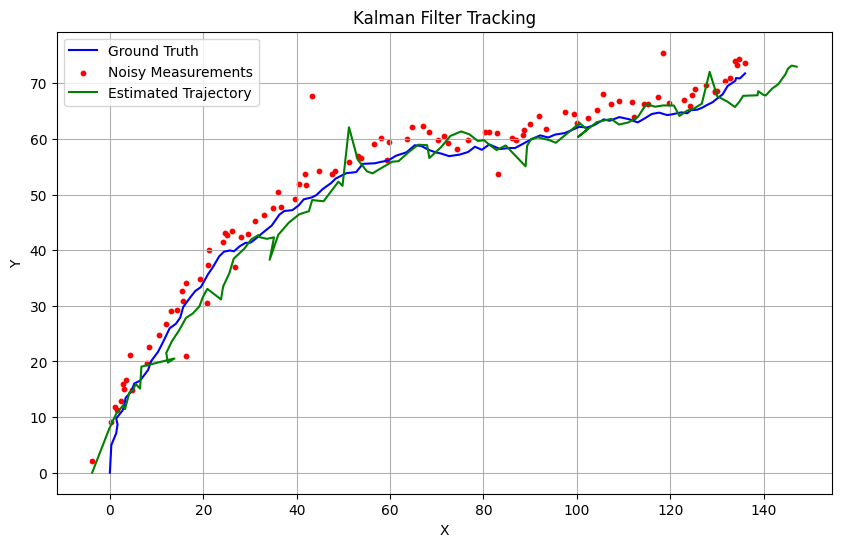

In [31]:
# calculating error metrics
def calculate_error_metrics(ground_truth, estimated):
    absolute_error = (np.abs(ground_truth - estimated))
    mean_abs_error = np.mean(absolute_error, axis=0)
    std_abs_error = np.std(absolute_error, axis=0)
    root_mean_squared_error = np.sqrt(np.mean(absolute_error**2, axis=0))
    return mean_abs_error, std_abs_error, root_mean_squared_error

# calculating error metrics for noisy and estimated coordinates separately
noisy_mean_abs_error, noisy_mse, noisy_rmse = calculate_error_metrics(np.column_stack((x_data, y_data)), noisy_coords)
estimated_mean_abs_error, estimated_mse, estimated_rmse = calculate_error_metrics(np.column_stack((x_data, y_data)), estimated_coords)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Ground Truth', color='b')
plt.scatter(a_data, b_data, label='Noisy Measurements', color='r', s=10)
plt.plot(estimated_coords[:, 0], estimated_coords[:, 1], label='Estimated Trajectory', color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kalman Filter Tracking')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Print the error metrics
print("Noisy Coordinates:")
print("Mean Absolute Error %.4f" % noisy_mean_abs_error[0])
print("Mean Squared Error %.4f" % noisy_mse[0])
print("Root Mean Squared Error %.4f" % noisy_rmse[0])

print("\nEstimated Coordinates:")
print("Mean Absolute Error %.4f" % estimated_mean_abs_error[1])
print("Mean Squared Error %.4f" % estimated_mse[1])
print("Root Mean Squared Error %.4f" % estimated_rmse[1])

Noisy Coordinates:
Mean Absolute Error 0.7396
Mean Squared Error 1.3596
Root Mean Squared Error 1.5477

Estimated Coordinates:
Mean Absolute Error 1.9599
Mean Squared Error 1.5103
Root Mean Squared Error 2.4743


In [46]:
# Calculate mean and standard deviation of MAE and RMSE for noisy coordinates
noisy_mae_mean = np.mean(noisy_mean_abs_error)
noisy_mae_std = np.std(noisy_mean_abs_error)
noisy_rmse_mean = np.mean(noisy_rmse)
noisy_rmse_std = np.std(noisy_rmse)

# Calculate mean and standard deviation of MAE and RMSE for estimated coordinates
estimated_mae_mean = np.mean(estimated_mean_abs_error)
estimated_mae_std = np.std(estimated_mean_abs_error)
estimated_rmse_mean = np.mean(estimated_rmse)
estimated_rmse_std = np.std(estimated_rmse)

# Print the mean and standard deviation of MAE and RMSE for noisy and estimated coordinates
print("Noisy Coordinates:")
print("Mean Absolute Error (MAE) - Mean: {:.2f}, Standard Deviation: {:.2f}".format(noisy_mae_mean, noisy_mae_std))
print("Root Mean Squared Error (RMSE) - Mean: {:.2f}, Standard Deviation: {:.2f}".format(noisy_rmse_mean, noisy_rmse_std))

print("\nEstimated Coordinates:")
print("Mean Absolute Error (MAE) - Mean: {:.2f}, Standard Deviation: {:.2f}".format(estimated_mae_mean, estimated_mae_std))
print("Root Mean Squared Error (RMSE) - Mean: {:.2f}, Standard Deviation: {:.2f}".format(estimated_rmse_mean, estimated_rmse_std))


Noisy Coordinates:
Mean Absolute Error (MAE) - Mean: 1.82, Standard Deviation: 1.08
Root Mean Squared Error (RMSE) - Mean: 2.54, Standard Deviation: 0.99

Estimated Coordinates:
Mean Absolute Error (MAE) - Mean: 4.51, Standard Deviation: 2.55
Root Mean Squared Error (RMSE) - Mean: 5.03, Standard Deviation: 2.56
